# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur adjoint au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>

# Devoir 2 - Régression linéaire ( 15 points )

Le présent devoir concerne les notions de la régression linéaire vues au Chapitre 2 du cours. Pour ce devoir, vous devez élaborer une analyse complète de régression à l'exercice 1 pour répondre aux questions de l'exercice 2.


## Devoir effectué par

Lam, Jefferson - 1963528

NOM, PRÉNOM - MARTICULE

**Déclaration d’intégrité relative au plagiat**

Nous certifions sur l’honneur :
- Que les résultats décrits dans ce rapport sont l’aboutissement de notre travail.
- Que nous sommes les auteurs de ce rapport.
- Que nous n'avons pas utilisé des sources ou résultats tiers sans clairement les citer et les référencer selon les règles bibliographiques préconisées.

Nous déclarons que ce travail ne peut être soupçonné de plagiat.



## Contexte : Glycémie des patients

Nous étudierons la glycémie sanguine (glu) en fonction de plusieurs variables explicatives : 
- l'âge du patient (age)
- l'indice de masse corporel du patient (bmi)
- le sexe du patient (sex)
- de la tension artérielle moyenne (map) 
- 5 indicateur sanguins (tc, ldl, hdl, tch et ltg). 


## Consignes

- Le devoir doit être remis sur Moodle **avant 23h59 lundi le 15 février 2020**. Les retards ne seront pas tolérés car le solutionnaire sera publié dès mardi.
- Le devoir a une pondération de 15%.
- Écrivez vos noms et vos matricules dans l'espace prévu à cet effet dans cette cellule.
- Vous pouvez compléter le devoir en équipe de deux personnes. Dans ce cas, un seul fichier par équipe doit être remis. Pour vous aider à trouver un coéquipier, le canal de discussion *#trouver_un_coéquipier* a été créé sur Slack.
- Le devoir doit être complété dans le présent calepin Jupyter en ajoutant autant de cellules de texte et de code que nécessaires. Vous remettrez ce fichier en format *.ipynb*. Le nom du fichier doit être *matricule1_matricule2_devoir2.ipynb*.
- N'utilisez que les librairies introduites à la cellule suivante.

## Chargement des libairies

In [1]:
using CSV 
using DataFrames
using Distributions
using Gadfly
using LinearAlgebra
using Statistics

## Chargement des données

In [2]:
data = CSV.read("diabetes.csv", DataFrame)
select!(data, Not(:prog))
first(data,5)

5×10 DataFrame. Omitted printing of 3 columns
│ Row │ age   │ sex   │ bmi     │ map     │ tc    │ ldl     │ hdl     │
│     │ Int64 │ Int64 │ Float64 │ Float64 │ Int64 │ Float64 │ Float64 │
├─────┼───────┼───────┼─────────┼─────────┼───────┼─────────┼─────────┤
│ 1   │ 59    │ 1     │ 32.1    │ 101.0   │ 157   │ 93.2    │ 38.0    │
│ 2   │ 48    │ 0     │ 21.6    │ 87.0    │ 183   │ 103.2   │ 70.0    │
│ 3   │ 72    │ 1     │ 30.5    │ 93.0    │ 156   │ 93.6    │ 41.0    │
│ 4   │ 24    │ 0     │ 25.3    │ 84.0    │ 198   │ 131.4   │ 40.0    │
│ 5   │ 50    │ 0     │ 23.0    │ 101.0   │ 192   │ 125.4   │ 52.0    │

## Exercice 1 - Régression linéaire simple (5 points)

### (a) Estimez les coefficients de détermination de la régression linéaire simple en utilisant la tension artérielle moyenne (map) comme variable explicative pour prédire la glycémie (gly).


In [3]:
# Definition des variables explicatives par extraction des données
x₁ = data[:,:map]
x₂ = data[:,:age]
x₃ = data[:,:sex]
x₄ = data[:,:bmi]
x₅ = data[:,:tc]
x₆ = data[:,:ldl]
x₇ = data[:,:hdl]
x₈ = data[:,:tch]
x₉ = data[:,:ltg]

y = data[:,:glu]
n = length(y)

442

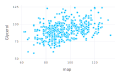

In [4]:
# Analyse exploratoire

Gadfly.set_default_plot_size(12cm, 8cm)
fig1_map_glu = plot(data, x=:map, y=:glu, Geom.point, 
    Coord.Cartesian(xmin=60, xmax=135),
    Guide.xlabel("map"),
    Guide.ylabel("Glycerol"))

In [5]:
# Calcul des parametres de regression en utilisant la variable explicative "map"

x̄ = mean(x₁)
ȳ = mean(y)

β̂₁ = sum((x₁[i] - x̄) * (y[i] - ȳ) for i=1:n) / sum( (x₁[i] - x̄)^2 for i=1:n)
β̂₀ = ȳ - β̂₁*x̄

println("β̂₁ = ", β̂₁)
println("β̂₀ = ", β̂₀)

β̂₁ = 0.32450691908643253
β̂₀ = 60.54670237176922


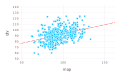

In [6]:
# Affichage de la droite de regression

plot(data, x=:map, y=:glu, Geom.point,
    intercept=[β̂₀], slope=[β̂₁], Geom.abline(color="red", style=:dash),
    Coord.cartesian(xmin=50, xmax=160, ymin=50, ymax=140),
    Guide.xlabel("map"),
    Guide.ylabel("gly"))

In [15]:
# Calcul de SSE, SSR, et SST

ŷ = β̂₀ .+ β̂₁*x₁
e = y - ŷ

SST = sum((y.-ȳ).^2)
SSR = sum((ŷ .- ȳ).^2)
SSE = sum(e.^2)

println("SSE = ", SSE)
println("SSR = ", SSR)
println("SST = ", SST)

SSE = 49400.099123247535
SSR = 8884.980062272778
SST = 58285.079185520364


### (b) Calculez le coefficient de détermination du modèle en (a).

In [16]:
R² = SSR / SST
println("R² = ", R²)

R² = 0.1524400444578971


### (c) Est-ce que la tension artérielle moyenne possède un pouvoir prédictif significatif pour la glycémie ?

Justifiez bien votre réponse.

Non. D'abord, puisque nous sommes dans le cas de la régression linéaire simple, nous pouvons déterminer si la tension artérielle moyenne possède un pouvoir prédictif significatif pour la glycémie en analysant la valeur de la valeur R². 
La valeur obtenue de 0.15 nous indique que 15% de la variabilité de la glycémie est expliquée par la tension artérielle moyenne. De plus, la variabilité expliquée par le modèle SSR est grande par rapport à la variabilité résiduelle SSE

### (d) Si un patient a une tension artérielle moyenne de 100, calculez un intervalle de confiance de niveau 95% pour sa glycémie.

In [18]:
# En supposant une map de 100
x₀ = 100

# Estimation de la valeur de glycemie pour une map de 100
Ŷ₀ = x₀*β̂₁ + β̂₀


92.99739428041246

### (e) Considérez l'indice de masse corporel comme (bmi) comme seule variable explicative. Laquelle des deux variables entre bmi et map possède le plus grand pouvoir prédictif de la glycémie ?

Justifiez bien votre réponse.

In [19]:
# Calculer les R² du bmi en relation avec le taux de glycerol

x̄₄ = mean(x₄)

β̂₁₄ = sum((x₄[i] - x̄₄) * (y[i] - ȳ) for i=1:n) / sum( (x₄[i] - x̄₄)^2 for i=1:n)
β̂₀₄ = ȳ - β̂₁₄*x̄₄

println("β̂₁ = ", β̂₁)
println("β̂₀ = ", β̂₀)

ŷ₄ = β̂₀₄ .+ β̂₁₄*x₄
e = y - ŷ₄

SST_bmi = sum((y.-ȳ).^2)
SSR_bmi = sum((ŷ₄ .- ȳ).^2)
SSE_bmi = sum(e.^2)

println("SSE = ", SSE)
println("SSR = ", SSR)
println("SST = ", SST)

R²_bmi = SSR_bmi / SST_bmi
println("R² = ", R²_bmi)

β̂₁ = 0.32450691908643253
β̂₀ = 60.54670237176922
SSE = 49400.099123247535
SSR = 8884.980062272778
SST = 58285.079185520364
R² = 0.15107213765813438


Map possède le plus grand pouvoir prédictif de la glycémie. En effet, le R2_map > R2_bmi

## Exercice 2 - Effet du sexe (5 points)

### (a) Ajoutez le sexe comme variable explicative au modèle de l'exercice 1(a). Est-ce que le sexe possède un pouvoir prédictif significatif de la glycémie ?

In [26]:
# L'équation de la droite de régression devient donc:
x₁ = data[:,:map]
x₃ = data[:,:sex]

X = hcat(ones(n), x₁, x₃)

β̂ = (X'X)\X'y

3-element Array{Float64,1}:
 61.537043941981935
  0.30025640581163165
  2.7862809091852907

In [27]:
ȳ = mean(y)
ŷ = X*β̂

e = y - ŷ

SST = sum((y .- ȳ).^2)
SSR = sum((ŷ .- ȳ).^2)
SSE = sum((e.^2))

println("La variabilité totale est de ", SST)
println("La variabilité expliquée est de ", SSR)
println("La variabilité résiduelle est de ", SSE)

R² = SSR/SST
println("Le coefficient de détermination est de ", R²)

La variabilité totale est de 58285.079185520364
La variabilité expliquée est de 9689.769635983028
La variabilité résiduelle est de 48595.30954953749
Le coefficient de détermination est de 0.1662478591671921


### (b) Interprétez les estimations des coefficients de régression que vous avez obtenues en 2 (b).

### (c) Choix du modèle bidimensionnel

Considérez le modèle de régression utilisant l'indice de masse corporelle et le sexe comme variables explicatives. Est-ce un meilleur modèle que celui de l'exercice 2(a) ? Est-ce cohérent avec la réponse du 1(e) ? Justifiez.

In [36]:
x₃ = data[:,:sex]
x₄ = data[:,:bmi]

X = hcat(ones(n), x₃, x₄)
β̂ =(X'X)\X'y

ŷ = X*β̂

e = y - ŷ

SST = sum((y .- ȳ).^2)
SSR = sum((ŷ .- ȳ).^2)
SSE = sum((e.^2))

println("La variabilité totale est de ", SST)
println("La variabilité expliquée est de ", SSR)
println("La variabilité résiduelle est de ", SSE)

R² = SSR/SST
println("Le coefficient de détermination est de ", R²)

La variabilité totale est de 58285.079185520364
La variabilité expliquée est de 10580.98851163804
La variabilité résiduelle est de 47704.09067388203
Le coefficient de détermination est de 0.18153854570496408


## Exercice 3 - Modèle tridimensionnel (5 points)

Considérez maintenant le modèle de régression linéaire utilisants les variables `:map`, `:bmi` et `:sex`.

### (a) Est-ce que l'hypothèse de linéarité semble raisonnable ?

Justifiez bien votre réponse. Si elle n'est pas raisonnable, discutez d'une approche possible pour régler la situation. Pas besoin de l'implémenter, seulement de discuter.

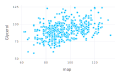

In [30]:
# Graphe de points pour map
Gadfly.set_default_plot_size(12cm, 8cm)
fig3_map_glu = plot(data, x=:map, y=:glu, Geom.point, 
    Coord.Cartesian(xmin=60, xmax=135),
    Guide.xlabel("map"),
    Guide.ylabel("Glycerol"))

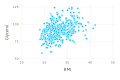

In [32]:
# Graphe de points pour bmi
Gadfly.set_default_plot_size(12cm, 8cm)
fig4_bmi_glu = plot(data, x=:bmi, y=:glu, Geom.point, 
    Guide.xlabel("BMI"),
    Guide.ylabel("Glycerol"))

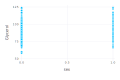

In [37]:
# Graphe de points pour sex

Gadfly.set_default_plot_size(12cm, 8cm)
fig5_sex_glu = plot(data, x=:sex, y=:glu, Geom.point, 
    Guide.xlabel("sex"),
    Guide.ylabel("Glycerol"))

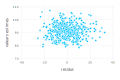

In [43]:
# Il faut tracer le diagramme de points illustrant les residus ei en fonction des estimations de Yi soit Y = xiB.
x₁ = data[:,:map]
x₃ = data[:,:sex]
x₄ = data[:,:bmi]

X = hcat(ones(n), x₁, x₃, x₄)
β̂ =(X'X)\X'y

ŷ = X*β̂
e = y - ŷ

fig5_sex_glu = plot(data, x=e, y=ŷ, Geom.point, 
    Guide.xlabel("residus"),
    Guide.ylabel("valeurs estimes"))

### (b) Est-ce que l'hypothèse d'homoscédasticité de la variance semble raisonnable ?

Justifiez bien votre réponse. Si elle n'est pas raisonnable, discutez d'une approche possible pour régler la situation. Pas besoin de l'implémenter, seulement de discuter.

### (c) Y a-t-il présence de multicolinéarité ?

Justifiez bien votre réponse. S'il y a multicolinéarité, que proposeriez vous pour limiter son effet ?